In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction à SymPy


<img src="https://upload.wikimedia.org/wikipedia/commons/5/54/Sympy_logo.svg" width="128" align="left"/>

**SymPy** est une bibliothèque Python dédiée au [calcul formel](https://fr.wikipedia.org/wiki/Calcul_formel) (ou calcul symbolique).
Elle permet entre autres de résoudre analytiquement des systèmes d'équations linéaires, des équations différentielles, de calculer des dérivées, des développements de Taylor, simplifier des expressions trigonométriques ou polynomiales, etc.
Tout comme de nombreuses bibliothèques Python, **SymPy** est un logiciel libre disponible sous la licence [New BSD](https://en.wikipedia.org/wiki/BSD_licenses#3-clause).
Son développement a commencé en 2005 sous l'égide de Ondrej Certik.
Comme à chaque fois, l'objectif de ce TP est de vous familiariser avec **SymPy** et sa syntaxe.
Pour cela, nous commencerons avec des exercices aussi simples qu'utiliser SymPy pour calculer analytiquement la dérivée de certaines fonctions.
Nous nous intéresserons ensuite aux développements de Taylor puis à l'utilisation de SymPy dans le cadre des équations de la mécanique (e.g. pendule simple et pendules doubles).
**SymPy** peut être importer à l'aide de la commande ci-dessous.

In [2]:
import sympy as sp
sp.init_printing()

---

## Les bases de SymPy

**SymPy** permet de manipuler *analytiquement* des expressions mathématiques.
Pour cela, il est nécessaire de définir les *symboles* avec lesquels la bibliothèque devra travailler.
La cellule ci-dessous illustre par exemple comment **SymPy** peut être utilisé pour diverses tâches.

In [3]:
# --> Définie la variable avec laquelle on travaillera.
x = sp.symbols("x")

- Calcul de la dérivée de la fonction

$$
f(x) = \sin(x) e^x
$$

In [4]:
# --> Définition de la fonction.
f = sp.sin(x) * sp.exp(x)

# --> Calcul de sa dérivée.
df = f.diff(x) # On aurait pu aussi utiliser la commande sp.diff(f, x)
df # Affiche joliement l'expression de df/dx

- Calcul de la primitive de la fonction

$$
f(x) = \sin(x^2)
$$

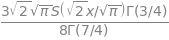

In [5]:
# --> Définition de la fonction.
f = sp.sin(x**2)

# --> Calcul de la primitive de f(x).
F = sp.integrate(f, x)
F

Dans l'expression ci-dessus, $\Gamma(x)$ est ce que l'on appelle la [fonction gamma](https://fr.wikipedia.org/wiki/Fonction_gamma).
Sa définition va bien au-delà d'un cours de mathématiques niveau ingénieur et ne sera donc pas abordé ici.
Le point à retenir est que **SymPy** connaît cette fonction potentiellement très compliquée, sait comment l'évaluer et comment la manipuler.

- Calcul de l'intégrale de $f(x)$ entre $-\infty$ et $+\infty$.

In [6]:
# --> Calcul de l'intégrale entre -oo et +oo.
sp.integrate(f, (x, -sp.oo, sp.oo))

- Calcul de la limite

$$
\lim_{x \to 0} \dfrac{\sin(x)}{x}
$$

In [7]:
# --> Définition de la fonction.
sinc = sp.sin(x) / x

# --> Calcul de la limite quand x --> 0.
sp.limit(sinc, x, 0)

- Calcul des racines du polynôme quadratique

$$
x^2 - 2 = 0
$$

In [8]:
# --> Définition de l'équation.
Eq = x**2 - 2

# --> Résolution (i.e. calcul des racines).
sol = sp.solve(Eq, x)
sol

- Calcul des racines du polynôme cubique

$$
x^3 + x^2 - 4x - 2 = 0
$$

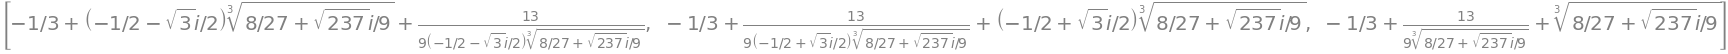

In [9]:
# --> Définition de l'équation.
eq = x**3 + x**2 - 4*x - 2

# --> Résolution (i.e. calcul des racines).
sol = sp.solve(eq, x)
sol

- Résolution de l'équation différentielle

$$
y^{\prime \prime} - y = e^t
$$

In [10]:
# --> Définition de la fonction et de la variable temps.
y = sp.Function("y")
t = sp.symbols("t")

# --> Définition de l'équation différentielle.
ode = sp.Eq(y(t).diff(t, 2) - y(t), sp.exp(t))

# --> Résolution de l'équation différentielle.
sol = sp.dsolve(ode, y(t))
sol

Les exemples ci-dessus ne sont qu'un petit aperçu des possibilités offertes par **SymPy**.
Dans la suite de ce TP, nous nous intéresserons en particulier aux développements de Taylor, à la dérivation des équations du mouvement à partir du Lagrangien d'un système ainsi qu'à leur linéarisation.
Pour en savoir plus sur **SymPy**, n'hésitez surtout pas à aller voir la documentation disponible [ici](https://docs.sympy.org/latest/tutorial/intro.html).

---

## Développements limités

Les [développements limités](https://fr.wikipedia.org/wiki/D%C3%A9veloppement_limit%C3%A9) sont probablement l'un des outils mathématiques les plus utilisés en physique et en ingénierie.
Le développement limité d'une fonction en un point est une approximation polynomiale de cette fonction au voisinage de ce point.
Pour une fonction $f : \mathbb{R} \to \mathbb{R}$ dérivable $n$ fois, son développement limité au points $x = x_0$ est donné par

$$
f(x) = f(x_0) + f^{\prime}(x_0) (x - x_0) + \dfrac{f^{\prime \prime}(x_0)}{2} (x - x_0)^2 + \cdots + \dfrac{f^{(n)}(x_0)}{n!} (x - x_0)^n + \mathcal{O}((x-x_0)^{n+1})
$$

Il existe pour les fonctions usuelles (i.e. $\ln(1 + x)$, $\exp(x)$, $\sin(x)$, $\cos(x)$, etc) des tables donnant les premiers termes de leur développement limité.
Pour des fonctions plus compliquées, calculer leur développement limité peut rapidement devenir un enfer.
C'est en cela que **SymPy** peut vous être grandement utile!
Quelques exemples sont donnés ci-dessous.

In [11]:
# -->
x = sp.symbols("x")

- Développement limité de $\exp(x)$ en $x = 0$.

In [12]:
# --> Définition de la fonction exponentielle.
f = sp.exp(x)

# --> Affiche les premiers termes de son développement de Taylor en x = 0 (jusqu'à l'ordre 8)
f.series(x, 0, 8)

- Développement limité de $\sin(x)$ en $x = 0$.

In [13]:
# --> Définition de la fonction.
f = sp.sin(x)

# ---> Order de l'approximation.
order = 4

# --> Affiche les premiers termes de son développement de Taylor en x = 0 (jusqu'à l'ordre voulu)
f.series(x, 0, order)

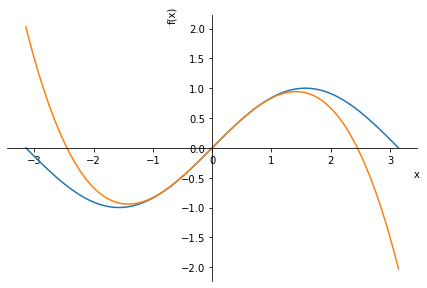

In [14]:
# --> Trace la fonction f(x) = sin(x) et son développement de Taylor à l'ordre voulu.
sp.plot(
    f, # Trace la fonction f(x).
    f.series(x, 0, order).removeO(), # Trace son développement limité.
    (x, -sp.pi, sp.pi) # Intervalle sur lequel tracer les deux fonctions.
)

- Développement limité de la fonction $\sin(x)$ en $x = \pi$.

In [15]:
# --> Affiche les premiers termes de son développement de Taylor en x = π (jusqu'à l'ordre 8)
f.series(x, sp.pi, 8)

- Développement limité de la fonction $\exp(\sin(x))$ en $x = 0$.

In [16]:
# --> Définition de la fonction.
f = sp.exp( sp.sin(x) )

# --> Affiche les premiers termes de son développement de Taylor en x = π (jusqu'à l'ordre 8)
f.series(x, 0, 8)

---

## Résolution d'équations différentielles ordinaires

Une autre domaine où **SymPy** excelle est la *résolution d'équations différentielles ordinaires*, notamment les équations linéaires.
Dans le cas d'équations non-linéaires, **SymPy** peut malgré tout être utilisé pour essayer de les simplifier au maximum avant de se tourner vers des bibliothèques telles que **SciPy** pour faire de la simulation numérique.

Dans la suite de ce TP, nous allons nous intéresser à deux exemples qui reviennent souvent en mécanique: l'oscillateur harmonique et le pendule simple.
Alors que le premier de ces deux exemples est modélisé à l'aide d'une équation linéaire, la dynamique du second fait intervenir une équation non-linéaire.

### Cas n°1 : L'oscillateur harmonique

L'équation de la dynamique de l'oscillateur harmonique est donné par

$$
\dfrac{\mathrm{d}^2 x}{\mathrm{d}t^2} + 2 \zeta \omega_0 \dfrac{\mathrm{d}x}{\mathrm{d}t} + \omega_0^2 x = 0.
$$

Dans l'équation ci-dessus, les paramètres sont les suivants:
- $\zeta \in \mathbb{R}_+$ est le paramètre d'amortissement de l'oscillateur. Si $\zeta > 1$, la dynamique de l'oscillateur est dite *sur-amortie*. Dans le cas contraire, elle est *sous-amortie* (et *pseudo-périodique*).
- $\omega_0 \in \mathbb{R}_+$ est la *fréquence propre* de l'oscillateur, i.e. la fréquence à laquelle il oscillerait en absence de frottement.

Sans aucune perte de généralité, ce système peut être simplifier en supposant que $\omega_0 = 1$.
Ceci est toujours possible et consiste juste à changer l'échelle de temps que l'on utilise pour décrire le système.
Ainsi, nous n'avons qu'un seul paramètre à considérer: le *taux d'amortissement* de l'oscillateur.

La cellule ci-dessous illustre comment définir un tel système de façon symbolique à l'aide de **SymPy**.

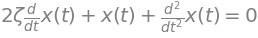

In [17]:
# --> Paramètres du système.
ζ = sp.symbols("ζ")  #<TAB> \zeta <TAB> pour faire appraître le caractère grec.

# --> Définition de la fonction que l'on cherche.
x = sp.Function("x")

# --> Définition de l'équation pour l'oscillateur harmonique.
ode = sp.Eq( x(t).diff(t, 2) + 2*ζ*x(t).diff(t, 1) + x(t), 0 )
ode

Comme vous pouvez le voir, **SymPy** interprète correctement notre modèle et **Jupyter** affiche la bonne équation.
A partir d'ici, il est possible d'utiliser certaines des capacités de **SymPy** pour obtenir la solution la plus générale de notre équation différentielle ordinaire linéaire.
Nous utiliserons la fonction `sp.dsolve` pour cela.

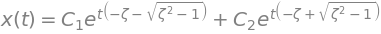

In [18]:
# --> Résolution de l'équation différentielle.
sp.dsolve(ode)

Comme attendu, **SymPy** identifie que la solution de notre équation différentielle du second ordre est une combinaison de fonctions exponentielles.
Les constantes $C_1$ et $C_2$ restent pour le moment indéterminées puisqu'elles nécessitent de connaître les conditions initiales.
Ceci peut être fait de plusieurs façons.
Ci-dessous,  nous présentons la façon la plus générale de le faire.
Pour cela, nous créons deux nouvelles variables, `x0` et `xdot0`, que nous traiterons comme des paramètres du problème.

In [19]:
# --> Paramètres pour les conditions initiales.
x0, xdot0 = sp.symbols("x0, xdot0")

# --> Définition des conditions initiales.
ics = {
    x(0): x0,
    x(t).diff(t).subs(t, 0) : xdot0
}

ics

⎧          ⎛d       ⎞│       ⎫
⎨x(0): x₀, ⎜──(x(t))⎟│   : ẋ₀⎬
⎩          ⎝dt      ⎠│t=0    ⎭

Une fois ces conditions initiales spécifiées, il est possible de calculer à nouveau la solution de notre équation différentielle en prenant explicitement en compte la définition de nos conditions initiales.

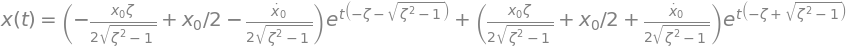

In [20]:
# --> Résolution du système complet.
sol = sp.dsolve(ode, ics=ics)
sol

Vous avez ci-dessus la solution à notre problème.
Il est important de noter que, lors de ses calculs, **SymPy** a implicitement assumé que le coefficient d'amortissement était différent de 1 (i.e. $\zeta \neq 1$).
Si cela s'avérer être le cas, cette solution serait alors fausse.
Un autre façon d'imposer les conditions initiales est néanmoins possible et permet de s'affranchir de ce problème.
Pour des raisons de temps, nous ne la présenterons malheureusement pas.
N'hésitez pas à aller voir la documentation en ligne pour en savoir plus.

#### Sous-amortissement ($\zeta < 1$)

Intéressons maintenant au cas où l'on connait les valeurs des différents paramètres.
Pour cela, nous choisirons les paramètres suivants:
- $\zeta = 0.1$, correspondant au cas d'un oscillateur sous-amorti,
- $x_0 = 1$,
- $\dot{x}_0 = 0$.

Dans la cellule ci-dessous, nous créons un nouvel objet **SymPy** identique au premier si ce n'est que l'on a substitué (`subs`) les paramètres symboliques par leur valeur numérique.

In [21]:
sous_amorti = sol.subs(
    {
        ζ: 0.1,
        x0: 1,
        xdot0: 0
    })

sous_amorti

Comma attendu, la solution à notre problème est maintenant la somme de deux exponentielles complexes.
Physiquement, cela correspond donc à un phénomène oscillatoire dont l'amplitude décroît exponentiellement au cours du temps.
La cellule ci-dessous illustre comment utiliser les fonctions de `plot` de **SymPy** pour rapidement visualiser cette solution.

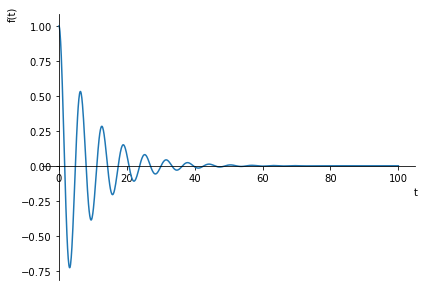

In [22]:
sp.plot(
    sous_amorti.rhs, 
    (t, 0, 100), 
    adaptive=False,
    nb_of_points=1024)

#### Sur-amortissement ($\zeta > 1$)

Intéressons maintenant au cas sur-amorti.
Pour cela, nous choisirons les paramètres suivants:
- $\zeta = 1.1$,
- $x_0 = 1$,
- $\dot{x}_0 = 0$.

Dans la cellule ci-dessous, nous créons un nouvel objet **SymPy** identique au premier si ce n'est que l'on a substitué (`subs`) les paramètres symboliques par leur valeur numérique.
Il s'agit exactement de la même manipulation que tout à l'heure.

In [23]:
sur_amorti = sol.subs(
    {
        ζ: 1.1,
        x0: 1,
        xdot0: 0
    })

sur_amorti

La solution à notre problème est maintenant la somme de deux exponentielles réelles.
Parce que les frottements sont beaucoup trop forts, notre oscillateur n'est donc pas en mesure d'osciller!
La figure ci-dessous illustre à quoi ressemble la solution.

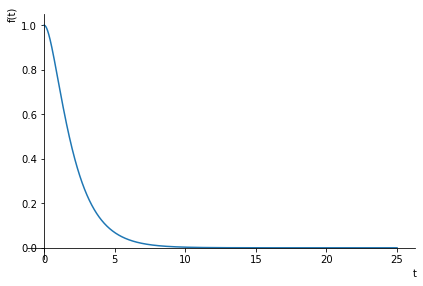

In [24]:
sp.plot(
    sur_amorti.rhs, 
    (t, 0, 25), 
    adaptive=False,
    nb_of_points=1024)

---

## Cas d'étude n°2: Le pendule simple


<img src="https://1.bp.blogspot.com/-yIsO2G1iEd8/Wkl7nllQnYI/AAAAAAAAAwI/0ndhlGurzaUVXoiQsxE4MYi0ynnt7xmOwCLcBGAs/s1600/SimplePendulum1.png" width="256px" align="left"/>

Le second exemple que l'on étudiera est cela du pendule simple, illustré à gauche.
On notera $\theta(t)$ sa position angulaire par rapport à l'axe vertical et $\dot{\theta}(t)$ sa vitesse angulaire.
On supposera par ailleurs que le pendule oscille uniquement sous l'action de la gravité et que tout frottement est absent du système.
Si l'on considère uniquement de petites oscillations, alors le mouvement du pendule est correctement décrit par l'oscillateur harmonique que l'on étudiait à la section précédente.
Dans le cas général, les équations décrivant la dynamique de ce système sont cependant non-linéaires et, mis à part dans de rares situations, il est impossible de trouver une solution analytique.

Les équations du mouvement sont données par

$$
\dfrac{\mathrm{d}^2 \theta}{\mathrm{d}t^2} + \sin(\theta) = 0.
$$

Bien que l'on puisse dériver cette équation à partir d'un bilan des forces, nous utiliserons dans la suite un autre approche beaucoup plus générale et puissante: la *mécanique lagrangienne*.
Ce n'est pas très grave si vous n'êtes pas habitué(e) à ce formalisme, tout ce que vous avez besoin de savoir sera expliqué en temps voulu.
L'objectif est simplement de vous illustrer sur un exemple simple une utilisation plus avancée de **SymPy**.

Comme à chaque fois, il est nécessaire de commencer par définir les variables dont nous aurons besoin.
Ceci est illustré ci-dessous.

In [25]:
# --> Définition de la position angulaire du pendule.
θ = sp.Function("theta")(t)

# --> Définition de la vitesse angulaire du pendule.
dθ = sp.diff(θ, t)

# --> Définition de l'accélération angulaire du pendule.
ddθ = sp.diff(θ, t, 2)

C'est maintenant qu'entre en scène le formalisme de la mécanique lagrangienne.
Pour cela, il nous est nécessaire de définir ce que l'on appelle le [Lagrangien](https://fr.wikipedia.org/wiki/Lagrangien) du système.
Le Lagragien $L$ est défini comme étant la différence de l'énergie cinétique (classiquement notée $T$) et de l'énergie potentielle (classiquement notée $V$) du système.
Pour notre pendule simple, son énergie cinétique est donnée par

$$
T = \dfrac{1}{2} \dot{\theta}^2
$$

tandis que son énergie potentielle est donnée par

$$
V = -\cos(\theta).
$$

Ainsi le Lagragien du système est

$$
\begin{aligned}
L & = T - V \\
& = \dfrac{1}{2} \dot{\theta}^2 + \cos(\theta).
\end{aligned}
$$

La cellule ci-dessous illustre comment le définir à l'aide de **SymPy**.

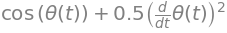

In [26]:
# --> Energie cinétique.
T = 1/2 * dθ**2

# --> Energie potentielle.
V = -sp.cos(θ)

# --> Lagrangien du système.
L = T - V
L

Maintenant que le Lagrangien du système est défini, il est possible de dériver les équations du mouvement.
Celles-ci sont données par ce que l'on appelle les *équations d'Euler-Lagrange*.
Pour notre problème, cette équation est

$$
\dfrac{\partial L}{\partial \theta} - \dfrac{\partial}{\partial t} \left( \dfrac{\partial L}{\partial \dot{\theta}} \right) = 0.
$$

Il est facile à l'aide de **SymPy** de calculer analytiquement cette équation.
Ceci est illustré ci-dessous.

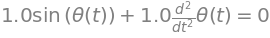

In [27]:
# --> Définition des équations d'Euler-Lagrange.
ode = sp.Eq( sp.diff(L, θ) - sp.diff(sp.diff(L, dθ), t), 0 )

# --> Simplification des équations.
ode = ode.simplify()

# --> Affichage des équations.
ode

Comme vous pouvez le voir, **SymPy** retrouve fort heureusement la même équation que celle que vous obtiendriez si vous aviez utiliser la technique habituelle consistant à faire un bilan des forces et à utiliser les différents principes de Newton.
Cette équation est néanmoins non-linéaire et n'admet pas de solution analytique.
Afin de pouvoir approximer la solution de ce système, il est alors nécessaire de se tourner vers la simulation numérique.
Les détails vont bien au-delà des objectifs de ce présent TP et les cellules suivantes n'ont donc pour objectif que de vous illustrer comment faire.

In [28]:
# --> Import de la fonction SciPy permet d'intégrer numériquement des équations différentielles.
from scipy.integrate import solve_ivp

# --> Import de matplotlib pour pouvoir tracer des figures.
import matplotlib.pyplot as plt

In [29]:
# --> Extraction du terme de droite des équations du mouvement.
rhs = sp.solve(ode, ddθ)[0]
rhs

# --> Transforme cette équation symbolique en une fonction python pouvant être utilisée dans un code.
acceleration = sp.lambdify(θ, rhs)

In [30]:
def pendulum(t, u):
    # --> Unpack variables.
    θ, dθ = u
    
    # --> Equation of motion.
    ddθ = acceleration(θ)
    
    return dθ, ddθ

In [50]:
# --> Echelle du temps sur laquelle on va intégrer numériquement les équations.
tspan = (0.0, 100.0)

# --> On enregistrera la solution sur 1024 points uniformément répartis sur la fenêtre d'intégration.
time = np.linspace(*tspan, 1024)

# --> Condition initiale pour la simulation.
u0 = [
    9*np.pi/100, # Position angulaire initiale du pendule.
    0.0           # Vitesse angulaire initiale du pendule.
]

# --> Résolution numérique des équations à l'aide de SciPy.
output = solve_ivp(
    pendulum, # Système à simuler.
    tspan,    # Fenêtre de temps pour la simulation.
    u0,       # Condition initiale.
    t_eval=time,     # Pas de temps auxquels on sauvegardera la solution.
    method="DOP853", # Schéma numérique utilisé
    atol=1e-12,
    rtol=1e-12
)

In [51]:
def wrap_phase(x):
    """
    Fonction s'assurant que x est compris entre -π et π.
    """
    x = (x + np.pi) % (2*np.pi) - np.pi
    return x

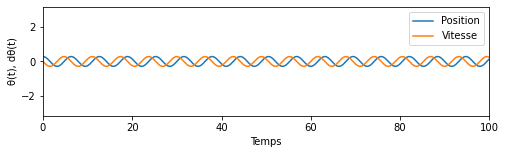

In [52]:
fig = plt.figure(figsize=(8, 2))

# --> Trace la position et vitesse angulaire en fonction du temps.
time, θ, dθ = output["t"], output["y"][0], output["y"][1]

plt.plot(time, wrap_phase(θ), label="Position")
plt.plot(time, wrap_phase(dθ), label="Vitesse")

plt.xlim(time.min(), time.max())
plt.ylim(-np.pi, np.pi)

plt.xlabel("Temps")
plt.ylabel("θ(t), dθ(t)")

plt.legend(loc=1)

Text(0.5, 1.0, 'Portrait de phase du pendule simple')

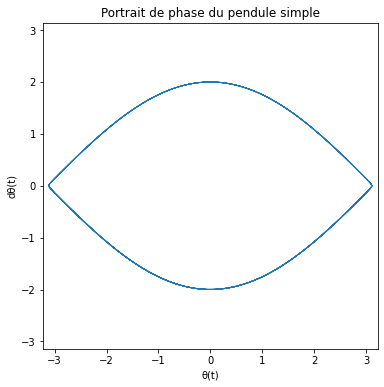

In [34]:
fig = plt.figure(figsize=(6, 6))

plt.plot(
    wrap_phase(θ),
    wrap_phase(dθ),
    lw=1,
)

plt.axis("equal")
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

plt.xlabel("θ(t)")
plt.ylabel("dθ(t)")

plt.title("Portrait de phase du pendule simple")

---

## Cas n°3: Le pendule double

In [35]:
# --> Définition de la position angulaire du premier et du second pendule.
θ1 = sp.Function("theta_1")(t)
θ2 = sp.Function("theta_2")(t)

# --> Définition de la vitesse angulaire des pendules.
dθ1 = sp.diff(θ1, t)
dθ2 = sp.diff(θ2, t)

# --> Définition de l'accélération angulaire des pendules.
ddθ1 = sp.diff(θ1, t, 2)
ddθ2 = sp.diff(θ2, t, 2)

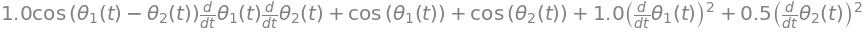

In [36]:
# --> Energie cinétique.
T = 1/2 * dθ1**2 + 1/2 * (dθ1**2 + dθ2**2 + 2*dθ1*dθ2*sp.cos(θ1 - θ2))

# --> Energie potentielle.
V = -sp.cos(θ1) - sp.cos(θ2)

# --> Lagrangien du système.
L = T - V
L

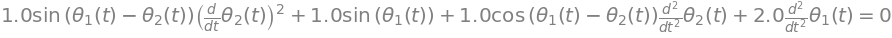

In [37]:
# --> Définition des équations d'Euler-Lagrange.
ode_1 = sp.Eq( sp.diff(L, θ1) - sp.diff(sp.diff(L, dθ1), t), 0 )

# --> Simplification des équations.
ode_1 = ode_1.simplify()

# --> Affichage des équations.
ode_1

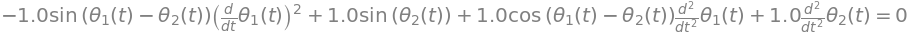

In [38]:
# --> Définition des équations d'Euler-Lagrange.
ode_2 = sp.Eq( sp.diff(L, θ2) - sp.diff(sp.diff(L, dθ2), t), 0 )

# --> Simplification des équations.
ode_2 = ode_2.simplify()

# --> Affichage des équations.
ode_2

In [39]:
# --> Extrait les équations du type ddθ = f(θ).
rhs = sp.solve([ode_1, ode_2], (ddθ1, ddθ2))

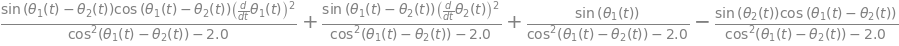

In [40]:
# --> Equation du mouvement pour le premier pendule.
rhs[ddθ1]

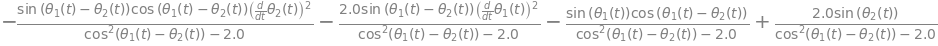

In [41]:
# --> Equation du mouvement pour le second pendule.
rhs[ddθ2]

In [42]:
# --> Transformation de ces deux expressions en fonction python.
acceleration_1 = sp.lambdify((θ1, θ2, dθ1, dθ2), rhs[ddθ1])
acceleration_2 = sp.lambdify((θ1, θ2, dθ1, dθ2), rhs[ddθ2])

In [43]:
def double_pendulum(t, u):
    # --> Unpack variables.
    θ1, dθ1, θ2, dθ2 = u
    
    # --> Equation of motion.
    ddθ1 = acceleration_1(θ1, θ2, dθ1, dθ2)
    ddθ2 = acceleration_2(θ1, θ2, dθ1, dθ2)
    
    return dθ1, ddθ1, dθ2, ddθ2

In [44]:
def simulation(t, u0):
    
    # --> Fenêtre d'intégration temporelle.
    tspan = (t.min(), t.max())
    
    # --> Résolution numérique des équations.
    output = solve_ivp(
        double_pendulum,
        tspan,
        u0,
        t_eval=t,
        method="DOP853",
        atol=1e-12,
        rtol=1e-12
    )
    
    return output["y"]

In [45]:
# --> Echelle du temps sur laquelle on va intégrer numériquement les équations.
time = np.linspace(0, 100, 1024)

# --> Condition initiale pour la simulation.
u0 = [
    75*np.pi/100, # Position angulaire initiale du pendule.
    0.0,           # Vitesse angulaire initiale du pendule.
    0.0, # Position angulaire initiale du pendule.
    0.0           # Vitesse angulaire initiale du pendule.
]

θ1, dθ1, θ2, dθ2 = simulation(time, u0)

Text(0, 0.5, 'Position angulaire')

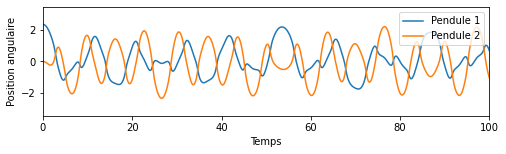

In [46]:
fig = plt.figure(figsize=(8, 2))

plt.plot(time, wrap_phase(θ1), label="Pendule 1")
plt.plot(time, wrap_phase(θ2), label="Pendule 2")

plt.xlim(time.min(), time.max())
plt.ylim(-1.1*np.pi, 1.1*np.pi)

plt.legend(loc=1)

plt.xlabel("Temps")
plt.ylabel("Position angulaire")

In [47]:
def coordonees_cartesiennes(θ1, θ2):
    # --> Coordonnées dans le plan (x, y) du premier pendule.
    x1, y1 = np.sin(θ1), -np.cos(θ1)
    
    # --> Coordonnées dans le plan (x, y) du deuxième pendule.
    x2, y2 = x1 + np.sin(θ2), y1 - np.cos(θ2)
    return x1, y1, x2, y2

In [48]:
# --> Passage des coordonnées polaires aux coordonnées cartésiennes.
x1, y1, x2, y2 = coordonees_cartesiennes(θ1, θ2)

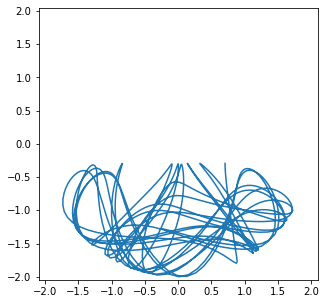

In [49]:
fig = plt.figure(figsize=(5, 5))

plt.plot(x2, y2)

plt.axis("equal")
plt.xlim(-2.1, 2.1)
plt.ylim(-2.1, 2.1)